# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem  <a name="introduction"></a>##

#### Prospects of starting a Restaurant cum Catering service by inspecting the Zones of Chennai ####

Chennai being one of the metropolitan areas, is one of the growing IT hubs of India. With a population of 8.7 million people (86,96,010) in an area of 426 $km^2$, the city of Chennai also has a lot of leading industries including automobile, textile, petrochemicals, and hardware manufacturing. All of this makes it a potential place to start a new business. 

While looking for places to open a business, we need to select the busiest zones in Chennai where a constant crowd is guaranteed. In a city like Chennai there will be a huge competition for businesses. Keeping this in mind, the surrounding of the selected zones should not have a lot of similar businesses as ours. Analyzing the office areas of the zones, it is expected that there will be a lot of restaurants. But a catering service is an idea which is not much explored in these areas. So, opening up a catering service which will also operate as a restaurant will be a brilliant idea to try.

While looking for places to open a business, we need to select the busiest zones in Chennai where a constant crowd is guaranteed. In a city like Chennai there will be a huge competition for businesses. Keeping this in mind, the surrounding of the selected zones should not have a lot of similar businesses as ours. Analyzing the office areas of the zones, it is expected that there will be a lot of restaurants. But a catering service is an idea which is not much explored in these areas. So, opening up a catering service which will also operate as a restaurant will be a brilliant idea to try.

The Business Problem can be stated as:

#### What is the best place to open a Restaurant-cum-Catering Service in Chennai?###

<img src='http://www.hcmadras.tn.nic.in/image/mhc-twilight-view.jpg'/>

#### Target Audience: ####

* The primary target audience for this project are definitely the entrepreneurs who want to open up a new business
* Investors who want to invest in good business ideas
* Offices in the locality of the business who will be interested in a contract-based catering service or employees who are interested in placing a catering order
* Students who are exploring Data Science and are trying to learn the art of telling a story by training, analyzing and learning from a data

## Data: Requirements and collection   <a name="data"></a>##
To open a business in an area, one needs to analyze the area, based on the average land prices, housing prices, most frequent venues, target audience, the competition and many other factors. 
In this project, the data requirements and collection are as below:

### Zones Data (along with Coordinates) ###


*    **Requirement:** There are 15 zones in Chennai with a total of 200 wards. The basic data required to start this project is the names of all these Zones along with their coordinates
*    **ollection:** Web scape the data of Zones of Chennai using **‘BeautifulSoup’**. Use **‘Python Geocoder’** to get the latitude and longitude values of these zones.

### Professional Venue Data ###


*   **Requirement:** From these 15 zones we need to find out which zones have the most professional venues like offices, hospitals, industries, factories etc. In other words, we need to know in which zones we will have a constant flow of people (customers).
*   **Collection:** Using **‘Foursquare’** by giving a specific category ID we can find the most frequent professional venues in these 15 zones.

### Nearby Venues Data ###


*   **Requirement:** We need to have an idea about the competition before we open a business. So, we need data about the most frequent venues nearby each selected zone.
*   **Collection:** Explore the zones using **‘Foursquare’**

### Pricing Data ###


*    **Requirement:** Pricing data will help us in two ways: 
        * By giving us an estimate of the price values if you want to buy the land or rent it for the business.
        * By giving us an idea about what kind of resident customers we are dealing with
*    **Collection:** Websites have pricing data for all zones of Chennai. (It is generally difficult to find accurate pricing data.)

## Step by step lets understand the data. ##

#### Zones Data (along with Coordinates) ####

Data about the zones of Chennai can be obtained [<b>from this website</b>](https://en.wikipedia.org/wiki/List_of_Chennai_Corporation_zones) using Web scraping. [<b>BeautifulSoup</b>](https://beautiful-soup-4.readthedocs.io/en/latest/) is a python library used to scrape data from HTML and XML files. It works along with a parser (lxml parser is being used here).

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt

 ##### Get the  data and parse this to Lxml #####

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_Chennai_Corporation_zones').text
soup = BeautifulSoup(source, 'lxml')

##### 'find' method can be used to find the required table with the class = 'wikitable sortable'. In this table, using the inspect feature of the browser, we can see that the rows are under a 'tr' tag. To get all the rows in the table we use 'find_all' method. #####

In [3]:
table = soup.find('table', class_ = 'wikitable sortable')
rows = table.find_all('tr')

##### In each row, each column text is under the tag 'td'. So we strip the text out of the column as follows.#####

In [4]:
locations = []
for row in rows:
    col = row.find_all('td')
    col = [x.text.strip() for x in col]
    try:
        locations.append(col[1])
    except:
        locations.append(0)
del locations[0]

##### Create an empty Data Frame and add the above generated columns to it #####

In [5]:
df_chennai = pd.DataFrame()
df_chennai['Location'] = locations
df_chennai.head()

,Location
0,Thiruvottiyur
1,Manali
2,Madhavaram
3,Tondiarpet
4,Royapuram


In [6]:
df_chennai.shape

(15, 1)

##### We now got all the zone names. Inorder to get the coordinates of these zones we will use 'Geocoders'. #####

In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Chennai_explorer")
df_chennai['Latitude']= df_chennai['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude))

In [8]:
df_chennai['Longitude']= df_chennai['Location'].apply(geolocator.geocode).apply(lambda x: (x.longitude))
df_chennai.head()

,Location,Latitude,Longitude
0,Thiruvottiyur,13.172222,80.304585
1,Manali,32.245461,77.187293
2,Madhavaram,13.142931,80.232517
3,Tondiarpet,13.127767,80.289585
4,Royapuram,13.114619,80.294028


In [9]:
df_chennai.shape

(15, 3)

#### let's visualize all these zones on a map using 'Folium' ####

In [10]:
#Chennai Lat long
Chennai_centre =[13.0827, 80.2707]

Chennai_Zones = folium.Map(location=Chennai_centre, zoom_start=12)
folium.Marker(Chennai_centre, popup='Chennai').add_to(Chennai_Zones)
# add markers to map
for lat, lng, label in zip(df_chennai['Latitude'], df_chennai['Longitude'], 
                           df_chennai['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(Chennai_Zones)  
    
Chennai_Zones

#### Professional Venue Data ####
Lets use Foursquare to find out which areas have the most professional venues. 
To do this, lets get all the professional venues in a radies of 1km from the each zone by using the Profesional venues [<b>category ID</b>](https://developer.foursquare.com/docs/resources/categories). 

##### To get access about the venues in the neighbourhoods we use Foursquare through the client details. #####

In [11]:
CLIENT_ID = 'Your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'Your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [12]:
Professional_category = '4d4b7105d754a06375d81259'
RADIUS = 1000
LIMIT = 100

def getNearbyProfVenues(names, latitudes, longitudes, radius=RADIUS):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Professional_category,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        try:    
        # make the GET request
            results = requests.get(url).json()["response"]['venues']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            results = requests.get(url).json()
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zone(Location)', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
        
    return(nearby_venues)

In [13]:
Chennai_Zones_ProfVenues = getNearbyProfVenues(names=df_chennai['Location'],
                                   latitudes=df_chennai['Latitude'],
                                   longitudes=df_chennai['Longitude']
                                  )

In [14]:
Chennai_Zones_ProfVenues.head()

,Zone(Location),Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Thiruvottiyur,13.172222,80.304585,Aakash Hospital,13.171589,80.304123,Hospital
1,Thiruvottiyur,13.172222,80.304585,Sri Anjaneyar Temple,13.168089,80.310348,Temple
2,Thiruvottiyur,13.172222,80.304585,Sri Pattinathar Temple,13.163456,80.307246,Temple
3,Thiruvottiyur,13.172222,80.304585,Royal Enfield,13.173354,80.307790,Factory
4,Thiruvottiyur,13.172222,80.304585,Angel Broking,13.167497,80.302412,Office


In [15]:
Chennai_Zones_ProfVenues.shape

(498, 7)

In [16]:
df_prof_venues = pd.DataFrame(Chennai_Zones_ProfVenues['Venue_Category'].value_counts())

df_prof_venues = df_prof_venues.reset_index()
df_prof_venues.columns = ['Venue_Category','Count']
df_prof_venues.head()

,Venue_Category,Count
0,Office,87
1,Hospital,52
2,Building,36
3,Temple,28
4,Factory,24


In [17]:
df_prof_venues.shape

(59, 2)

In [18]:
df_zone_count = pd.DataFrame(Chennai_Zones_ProfVenues['Zone(Location)'].value_counts())
df_zone_count = df_zone_count.reset_index()
df_zone_count.columns = ['Zone(Location)','Count']
df_zone_count.head()

,Zone(Location),Count
0,Alandur,50
1,Perungudi,50
2,Ambattur,49
3,Teynampet,48
4,Adyar,46


In [19]:
df_zone_count.shape

(15, 2)

##### We can see the count of professional venues obtained from each zone. Most of these venues are offices. So we will select the top 5 zones with a maximum frequency of professional venues. #####

In [20]:
zone_list = list(df_zone_count['Zone(Location)'][0:5])
selected_zones_df = df_chennai.loc[df_chennai['Location'].isin(zone_list)]
selected_zones_df = selected_zones_df.sort_values(by=['Location'])
selected_zones_df = selected_zones_df.reset_index(drop=True)

selected_zones_df.head()

,Location,Latitude,Longitude
0,Adyar,13.006450,80.257779
1,Alandur,12.994373,80.194284
2,Ambattur,13.119375,80.150765
3,Perungudi,12.971024,80.241805
4,Teynampet,13.044324,80.249846


In [21]:
selected_zones_df.shape

(5, 3)

##### Lets visualize these selected zones. #####

In [22]:
#Chennai Lat long
chennai_centre =[13.0827, 80.2707]

chennai_zones_map = folium.Map(location=chennai_centre, zoom_start=12)
folium.Marker(chennai_centre, popup='Chennai').add_to(chennai_zones_map)
# add markers to map
for lat, lng, label in zip(selected_zones_df['Latitude'], selected_zones_df['Longitude'], 
                           selected_zones_df['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(chennai_zones_map)  
    
chennai_zones_map

#### Nearby Venues Data ####
Like we did early, lets use foursquare to explore 1km around the selected zones and collect venue details.

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=RADIUS):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zone(Location)', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
        
    return(nearby_venues)

In [24]:
chennai_5zones_venues = getNearbyVenues(names=selected_zones_df['Location'],
                                   latitudes=selected_zones_df['Latitude'],
                                   longitudes=selected_zones_df['Longitude']
                                  )

In [25]:
chennai_5zones_venues.head()

,Zone(Location),Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Adyar,13.00645,80.257779,Bombay Brassiere,13.006961,80.256419,North Indian Restaurant
1,Adyar,13.00645,80.257779,Cool Biz,13.006632,80.257275,Juice Bar
2,Adyar,13.00645,80.257779,McDonald's,13.006632,80.254255,Burger Joint
3,Adyar,13.00645,80.257779,Prems Graama Bhojanam,13.006345,80.253995,Vegetarian / Vegan Restaurant
4,Adyar,13.00645,80.257779,Adyar Ananda Bhavan,13.005824,80.257368,Indian Restaurant


In [26]:
chennai_5zones_venues.shape

(209, 7)

In [27]:
df_5zones_venues = pd.DataFrame(chennai_5zones_venues['Venue_Category'].value_counts()[0:10])
df_5zones_venues = df_5zones_venues.reset_index()
df_5zones_venues.columns=['Venue_Category', 'Count']

df_5zones_venues.head()

,Venue_Category,Count
0,Indian Restaurant,43
1,Hotel,14
2,Café,12
3,Pizza Place,11
4,Lounge,7


In [28]:
df_5zones_venues.shape

(10, 2)

##### We can see that venues data in the zones. To get a better understanding let's plot a Bar graph for this data #####

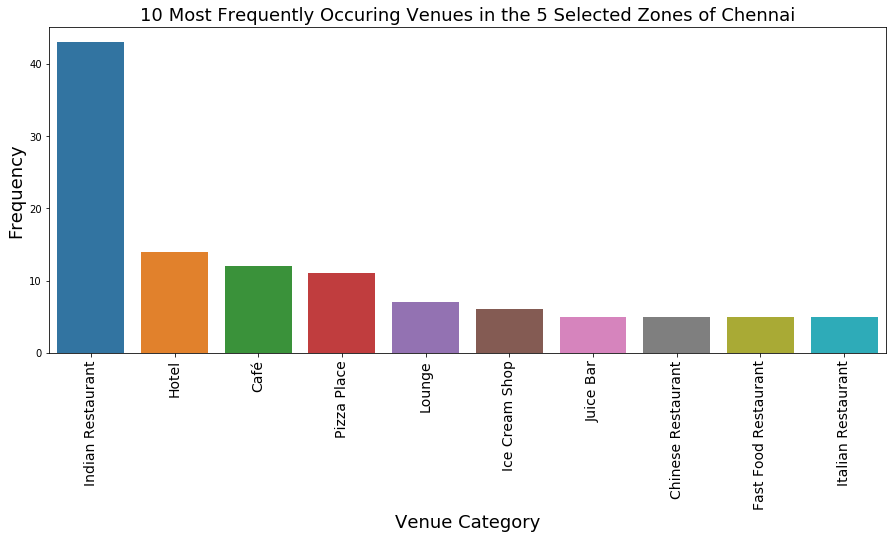

In [29]:
fig = plt.figure(figsize=(15,6))
s=sns.barplot(x="Venue_Category", y="Count", data=df_5zones_venues)
s.set_xticklabels(s.get_xticklabels(), rotation=90,fontsize=14)

plt.title('10 Most Frequently Occuring Venues in the 5 Selected Zones of Chennai', fontsize=18)
plt.xlabel("Venue Category", fontsize=18)
plt.ylabel ("Frequency", fontsize=18)

plt.show()

##### To check for other type of restaurants in the selected zones let's look at venues which have the word restaurant in their venue category. #####

In [30]:
chennai_5zones_venues_only_restaurant = chennai_5zones_venues[chennai_5zones_venues['Venue_Category'].str.contains('Restaurant')].reset_index(drop=True)
chennai_5zones_venues_only_restaurant.head()

,Zone(Location),Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Adyar,13.00645,80.257779,Bombay Brassiere,13.006961,80.256419,North Indian Restaurant
1,Adyar,13.00645,80.257779,Prems Graama Bhojanam,13.006345,80.253995,Vegetarian / Vegan Restaurant
2,Adyar,13.00645,80.257779,Adyar Ananda Bhavan,13.005824,80.257368,Indian Restaurant
3,Adyar,13.00645,80.257779,Daawat The Kebab Shop,13.006689,80.253728,North Indian Restaurant
4,Adyar,13.00645,80.257779,Rainforest Restaurant,13.006993,80.257767,Indian Restaurant


In [31]:
chennai_5zones_venues_only_restaurant.shape

(81, 7)

In [32]:
df_venue_rest = pd.DataFrame(chennai_5zones_venues_only_restaurant['Venue_Category'].value_counts()[0:10])
df_venue_rest = df_venue_rest.reset_index()
df_venue_rest.columns = ['Restaurant', 'Count']
df_venue_rest.head()

,Restaurant,Count
0,Indian Restaurant,43
1,Chinese Restaurant,5
2,Italian Restaurant,5
3,Fast Food Restaurant,5
4,South Indian Restaurant,3


In [33]:
df_venue_rest.shape

(10, 2)

 ##### Indian Restaurants are the most frequent restaurants in the zones which implies that people prefer eating Indian food in these areas. #####

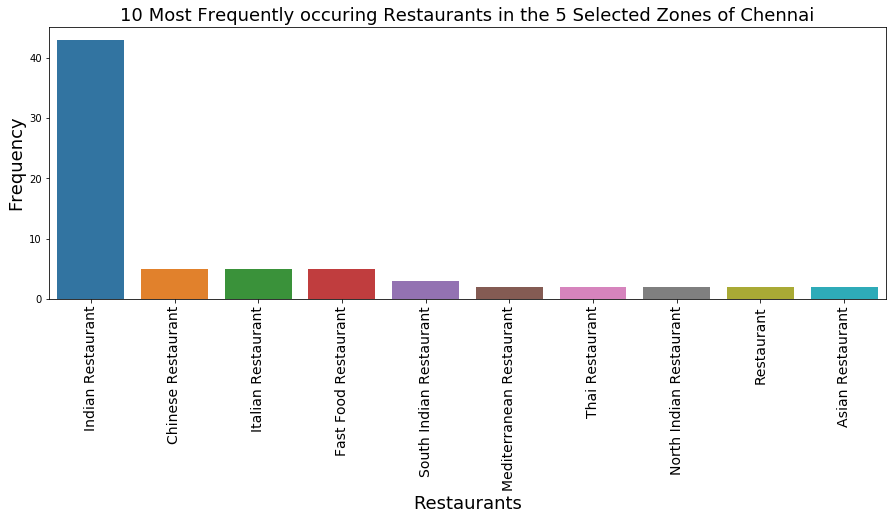

In [34]:
fig = plt.figure(figsize=(15,5))
plot=sns.barplot(x="Restaurant", y="Count", data=df_venue_rest)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90,fontsize=14)

plt.title('10 Most Frequently occuring Restaurants in the 5 Selected Zones of Chennai', fontsize=18)
plt.xlabel("Restaurants", fontsize=18)
plt.ylabel ("Frequency", fontsize=18)

plt.show()

In [35]:
chennai_5zones_venues_only_restaurant['Zone(Location)'].value_counts()

Teynampet    32
Adyar        27
Alandur      10
Perungudi     9
Ambattur      3
Name: Zone(Location), dtype: int64

##### Most of the restaurants are located in 'Teynampet'. Lets visualize this on a folium map. #####

In [36]:
chennai_zones_restaurants_map = folium.Map(location=Chennai_centre, zoom_start=12)
folium.Marker(Chennai_centre, popup='Chennai').add_to(chennai_zones_restaurants_map)

zone_list = ['Teynampet', 'Perungudi', 'Ambattur', 'Adyar', 'Kodambakkam', 'Alandur']

colors = ['blue', 'red','black','green' ,'magenta','maroon']


for lat, long, poi, zone in zip(chennai_5zones_venues_only_restaurant['Venue_Lat'], 
                                  chennai_5zones_venues_only_restaurant['Venue_Long'], 
                                  chennai_5zones_venues_only_restaurant['Venue_Category'], 
                                  chennai_5zones_venues_only_restaurant['Zone(Location)']):
    label = folium.Popup(str(zone), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color=colors[zone_list.index(zone)],
        fill=True,
        fill_color=colors[zone_list.index(zone)],
        fill_opacity=0.3).add_to(chennai_zones_restaurants_map)

chennai_zones_restaurants_map

#### Pricing Data Average price per sqft in each selected zone is taken manually from [<b>this website </b>](https://www.99acres.com/property-rates-and-price-trends-in-chennai). ####

In [37]:
avg_price_per_sqft = {'Adyar':12325,'Alandur':7607,'Ambattur': 4420,'Kodambakkam':7607,'Perungudi':6885,'Teynampet':12792}
avg_price_df= pd.DataFrame.from_dict(avg_price_per_sqft, orient='index')
avg_price_df = avg_price_df.reset_index()
avg_price_df.columns=['Location', 'Avg Price per sqft']

avg_price_df.head()

,Location,Avg Price per sqft
0,Adyar,12325
1,Alandur,7607
2,Ambattur,4420
3,Kodambakkam,7607
4,Perungudi,6885


In [38]:
avg_price_df.shape

(6, 2)

##### To make more sense of the data, lets plot a bar plot of the data. #####

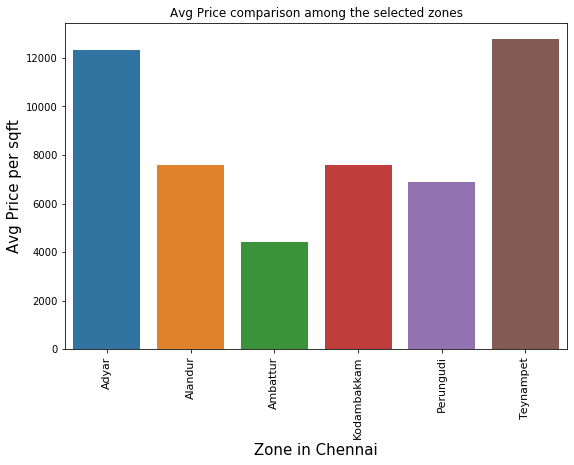

In [39]:
fig = plt.figure(figsize=(9,6))
price_bar = sns.barplot(x='Location',y ='Avg Price per sqft',data=avg_price_df)
price_bar.set_xticklabels(price_bar.get_xticklabels(), rotation=90, fontsize=11)
plt.xlabel('Zone in Chennai',fontsize=15)
plt.ylabel('Avg Price per sqft',fontsize=15)
plt.title('Avg Price comparison among the selected zones')

plt.show()

##### Merge this data into the selected zones data #####

In [40]:
df_merge = pd.merge(selected_zones_df, avg_price_df, how='right', on = 'Location')
df_merge.head()

,Location,Latitude,Longitude,Avg Price per sqft
0,Adyar,13.006450,80.257779,12325
1,Alandur,12.994373,80.194284,7607
2,Ambattur,13.119375,80.150765,4420
3,Perungudi,12.971024,80.241805,6885
4,Teynampet,13.044324,80.249846,12792


In [41]:
df_merge.shape

(6, 4)

## Methodology  <a name="methodology"></a>##

This project requires us to find the business or professional zones of Chennai and explore these zones to find out the frequent venues of these zones. All of these is done so that we choose a zone which has more demand for our new business 
Firstly, we have collected all the required data and have done some exploratory data analysis to find the top 6 professional Zones of Chennai based on the professional venues’ frequency in that zone. We found that the most frequent Professional Venue in all the zones combined is an "Office". Frequent venues were explored in these selected zones and it was found that venue category of "Indian Restaurant" is the most frequent venue nearby these selected zones. From this it is clear who our potential customers are and what they prefer.
Secondly, we need to analyze the data a little more to get insights into the venue category. This can be done by using one-hot encoding. Thirdly. We will use a machine learning method called K-Means Cluster to cluster the zones into groups depending how similar or dissimilar they are.

## Analysis  <a name="analysis"></a>##

First, let's make a dataframe which contains the selected zones and their nearby professional venues.

In [42]:
prof_venue_list = list(df_prof_venues['Venue_Category'])
selected_venues_df = Chennai_Zones_ProfVenues[Chennai_Zones_ProfVenues['Venue_Category'].isin(prof_venue_list)]
selected_venues_df = selected_venues_df[selected_venues_df['Zone(Location)'].isin(zone_list)]
selected_venues_df = selected_venues_df.sort_values(by=['Zone(Location)'])
selected_venues_df = selected_venues_df.reset_index(drop=True)

selected_venues_df.head()

,Zone(Location),Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Adyar,13.00645,80.257779,Sree Rama Lending Library,13.001400,80.258500,Library
1,Adyar,13.00645,80.257779,KRMM,13.010344,80.251171,High School
2,Adyar,13.00645,80.257779,Hindu Senior Secondary,12.998261,80.253654,High School
3,Adyar,13.00645,80.257779,Odyssey Ltd.,13.006865,80.253473,Building
4,Adyar,13.00645,80.257779,ilovereadin',13.007550,80.264243,Library


In [43]:
selected_venues_df.shape

(289, 7)

##### One hot encoding is done on the venue categories to better understand them.#####

In [44]:
chennai_5zones_prof_venues_onehot = pd.get_dummies(selected_venues_df[['Venue_Category']], prefix="", prefix_sep="")

#add district column back to dataframe
chennai_5zones_prof_venues_onehot['Zone(Location)'] = selected_venues_df['Zone(Location)'] 
#move district column to the first column
fixed_columns = [chennai_5zones_prof_venues_onehot.columns[-1]] + list(chennai_5zones_prof_venues_onehot.columns[:-1])
chennai_5zones_prof_venues_onehot = chennai_5zones_prof_venues_onehot[fixed_columns]

chennai_5zones_prof_venues_onehot.head()

,Zone(Location),Adult Education Center,Advertising Agency,Amphitheater,Auditorium,Building,Business Center,Campaign Office,Church,City Hall,...,Post Office,Private School,Religious School,School,Social Club,Spiritual Center,Tech Startup,Temple,Waste Facility,Wedding Hall
0,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adyar,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
chennai_5zones_prof_venues_onehot.shape

(289, 49)

In [46]:
chennai_5zones_prof_venues_grouped = chennai_5zones_prof_venues_onehot.groupby('Zone(Location)').mean().reset_index()

chennai_5zones_prof_venues_grouped.head()

,Zone(Location),Adult Education Center,Advertising Agency,Amphitheater,Auditorium,Building,Business Center,Campaign Office,Church,City Hall,...,Post Office,Private School,Religious School,School,Social Club,Spiritual Center,Tech Startup,Temple,Waste Facility,Wedding Hall
0,Adyar,0.00,0.0,0.00,0.021739,0.065217,0.000000,0.000000,0.021739,0.021739,...,0.043478,0.00,0.0,0.021739,0.00,0.021739,0.108696,0.065217,0.000000,0.000000
1,Alandur,0.00,0.0,0.00,0.020000,0.060000,0.000000,0.000000,0.040000,0.000000,...,0.100000,0.02,0.0,0.020000,0.02,0.000000,0.040000,0.120000,0.000000,0.000000
2,Ambattur,0.00,0.0,0.00,0.040816,0.122449,0.000000,0.000000,0.020408,0.000000,...,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.040816,0.000000,0.000000,0.040816
3,Kodambakkam,0.00,0.0,0.00,0.000000,0.086957,0.021739,0.021739,0.021739,0.000000,...,0.000000,0.00,0.0,0.021739,0.00,0.021739,0.086957,0.043478,0.021739,0.000000
4,Perungudi,0.02,0.0,0.02,0.000000,0.080000,0.000000,0.000000,0.040000,0.000000,...,0.020000,0.00,0.0,0.000000,0.00,0.000000,0.060000,0.000000,0.000000,0.000000


In [47]:
chennai_5zones_prof_venues_grouped.shape

(6, 49)

##### Let's now find the top 5 frequent venues in all the selected zone. #####

In [48]:
num_top_venues = 5

for places in chennai_5zones_prof_venues_grouped['Zone(Location)']:
    print("========="+places+"=========")
    temp = chennai_5zones_prof_venues_grouped[chennai_5zones_prof_venues_grouped['Zone(Location)'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

=========Adyar=========
          Venue  Freq
0        Office  0.20
1  Tech Startup  0.11
2      Hospital  0.09
3   High School  0.09
4        Temple  0.07


=========Alandur=========
          Venue  Freq
0        Temple  0.12
1   Post Office  0.10
2      Hospital  0.08
3        Office  0.08
4  Hindu Temple  0.06


=========Ambattur=========
          Venue  Freq
0      Hospital  0.20
1        Office  0.12
2      Building  0.12
3   Event Space  0.08
4  Hindu Temple  0.08


=========Kodambakkam=========
          Venue  Freq
0        Office  0.22
1   Event Space  0.09
2      Building  0.09
3  Tech Startup  0.09
4        Temple  0.04


=========Perungudi=========
             Venue  Freq
0           Office  0.36
1  Conference Room  0.16
2     Meeting Room  0.12
3         Building  0.08
4  Coworking Space  0.06


=========Teynampet=========
         Venue  Freq
0       Office  0.23
1     Building  0.17
2     Hospital  0.10
3  Event Space  0.08
4       Church  0.06




#### Doing the same for other nearby venues. #####

In [49]:
chennai_5zones_other_venues_onehot = pd.get_dummies(chennai_5zones_venues[['Venue_Category']], prefix="", prefix_sep="")

#add district column back to dataframe
chennai_5zones_other_venues_onehot['Zone(Location)'] = chennai_5zones_venues['Zone(Location)'] 
#move district column to the first column
fixed_columns = [chennai_5zones_other_venues_onehot.columns[-1]] + list(chennai_5zones_other_venues_onehot.columns[:-1])
chennai_5zones_other_venues_onehot = chennai_5zones_other_venues_onehot[fixed_columns]

chennai_5zones_other_venues_onehot.head()

,Zone(Location),African Restaurant,Amphitheater,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Sandwich Place,Snack Place,South Indian Restaurant,Supermarket,Tea Room,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
chennai_5zones_other_venues_onehot.shape

(209, 73)

In [51]:
chennai_5zones_other_venues_grouped = chennai_5zones_other_venues_onehot.groupby('Zone(Location)').mean().reset_index()

chennai_5zones_other_venues_grouped.head()

,Zone(Location),African Restaurant,Amphitheater,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Sandwich Place,Snack Place,South Indian Restaurant,Supermarket,Tea Room,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,Adyar,0.000000,0.000000,0.016129,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,...,0.016129,0.016129,0.000000,0.000000,0.000000,0.016129,0.000000,0.016129,0.000000,0.016129
1,Alandur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,...,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000
2,Ambattur,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000
3,Perungudi,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,...,0.095238,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Teynampet,0.011494,0.011494,0.000000,0.011494,0.000000,0.000000,0.011494,0.011494,0.022989,...,0.011494,0.000000,0.011494,0.000000,0.022989,0.011494,0.000000,0.000000,0.011494,0.011494


In [52]:
chennai_5zones_other_venues_grouped.shape

(5, 73)

In [53]:
num_top_venues = 5

for places in chennai_5zones_other_venues_grouped['Zone(Location)']:
    print("========="+places+"=========")
    temp = chennai_5zones_other_venues_grouped[chennai_5zones_other_venues_grouped['Zone(Location)'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

=========Adyar=========
                     Venue  Freq
0        Indian Restaurant  0.27
1              Pizza Place  0.06
2                     Café  0.06
3             Dessert Shop  0.05
4  North Indian Restaurant  0.03


=========Alandur=========
               Venue  Freq
0  Indian Restaurant  0.23
1              Hotel  0.12
2      Train Station  0.08
3        Pizza Place  0.08
4     Breakfast Spot  0.08


=========Ambattur=========
               Venue  Freq
0     Ice Cream Shop  0.15
1  Indian Restaurant  0.15
2        Flea Market  0.15
3      Movie Theater  0.15
4          Multiplex  0.08


=========Perungudi=========
                Venue  Freq
0   Indian Restaurant  0.24
1      Sandwich Place  0.10
2            Boutique  0.10
3         Pizza Place  0.10
4  Chinese Restaurant  0.05


=========Teynampet=========
                Venue  Freq
0   Indian Restaurant  0.15
1               Hotel  0.13
2              Lounge  0.07
3                Café  0.06
4  Italian Restaurant  0.05



##### Lets make the above analysis into a Dataframe. #####

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Lets take the top 10 most common venues in the selected zones for making this Dataframe. #####

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
chennai_5zones_top10_venues_sorted = pd.DataFrame(columns=columns)
chennai_5zones_top10_venues_sorted['Location'] = chennai_5zones_other_venues_grouped['Zone(Location)']

for ind in np.arange(chennai_5zones_other_venues_grouped.shape[0]):
    chennai_5zones_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_5zones_other_venues_grouped.iloc[ind, :], num_top_venues)


chennai_5zones_top10_venues_sorted

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,Indian Restaurant,Pizza Place,Café,Dessert Shop,Rock Club,Ice Cream Shop,North Indian Restaurant,Bookstore,Juice Bar,Electronics Store
1,Alandur,Indian Restaurant,Hotel,Pizza Place,Train Station,Café,Breakfast Spot,Burrito Place,Chinese Restaurant,Fast Food Restaurant,Supermarket
2,Ambattur,Movie Theater,Flea Market,Ice Cream Shop,Indian Restaurant,Department Store,Train Station,Asian Restaurant,Pizza Place,Multiplex,Clothing Store
3,Perungudi,Indian Restaurant,Sandwich Place,Boutique,Pizza Place,Middle Eastern Restaurant,Platform,Chinese Restaurant,Food Court,Café,Fast Food Restaurant
4,Teynampet,Indian Restaurant,Hotel,Lounge,Café,Italian Restaurant,Restaurant,Ice Cream Shop,Nightclub,Fast Food Restaurant,Pizza Place


In [56]:
chennai_5zones_top10_venues_sorted.shape

(5, 11)

##### Let's cluster these zones based on the common venues using K-Means Clustering To decide the number of clusters lets use the Elbow method. #####

In [57]:
from sklearn.cluster import KMeans
chennai_clustering = chennai_5zones_other_venues_grouped.drop('Zone(Location)', 1)

sum_squared_dist=[]
K = range(1,6)
for k in K:
    km = KMeans(init= 'k-means++',n_clusters=k, n_init=12, random_state=4)
    km = km.fit(chennai_clustering)
    sum_squared_dist.append(km.inertia_)

print(sum_squared_dist)

[0.16904193347127228, 0.0843944284267145, 0.04646777897428634, 0.021845373647257853, 0.0]


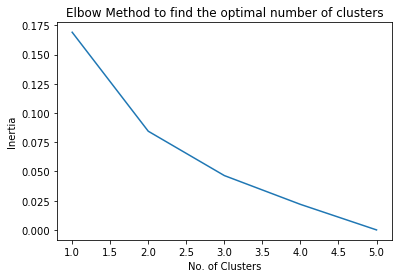

In [58]:
a = list(range(1,len(sum_squared_dist)+1))
plt.plot(a,sum_squared_dist)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to find the optimal number of clusters')
plt.show()

##### Here, least inertia value is required for a K-Means Clustering method. Hence 4 clusters can be used as the Elbow point. #####

In [59]:
clusters = 4

kmeans_cluster = KMeans(init= 'k-means++',n_clusters=clusters, n_init=12, random_state=4).fit(chennai_clustering)

kmeans_cluster.labels_

array([1, 2, 0, 3, 2], dtype=int32)

##### Lets form a Dataframe including the avg price of the zones and their cluster label #####

In [60]:
chennai_df_merged = pd.merge(chennai_5zones_top10_venues_sorted, df_merge, how ='inner',on = 'Location')
chennai_df_merged['Cluster Label'] = kmeans_cluster.labels_
chennai_df_merged

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Avg Price per sqft,Cluster Label
0,Adyar,Indian Restaurant,Pizza Place,Café,Dessert Shop,Rock Club,Ice Cream Shop,North Indian Restaurant,Bookstore,Juice Bar,Electronics Store,13.006450,80.257779,12325,1
1,Alandur,Indian Restaurant,Hotel,Pizza Place,Train Station,Café,Breakfast Spot,Burrito Place,Chinese Restaurant,Fast Food Restaurant,Supermarket,12.994373,80.194284,7607,2
2,Ambattur,Movie Theater,Flea Market,Ice Cream Shop,Indian Restaurant,Department Store,Train Station,Asian Restaurant,Pizza Place,Multiplex,Clothing Store,13.119375,80.150765,4420,0
3,Perungudi,Indian Restaurant,Sandwich Place,Boutique,Pizza Place,Middle Eastern Restaurant,Platform,Chinese Restaurant,Food Court,Café,Fast Food Restaurant,12.971024,80.241805,6885,3
4,Teynampet,Indian Restaurant,Hotel,Lounge,Café,Italian Restaurant,Restaurant,Ice Cream Shop,Nightclub,Fast Food Restaurant,Pizza Place,13.044324,80.249846,12792,2


##### Cluster 1 #####

In [61]:
chenani_cluster_1 = chennai_df_merged.loc[chennai_df_merged['Cluster Label'] == 0,chennai_df_merged.columns[[0]+[1]+[2]+[3]+list(range(11, chennai_df_merged.shape[1]))]]
chenani_cluster_1

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Latitude,Longitude,Avg Price per sqft,Cluster Label
2,Ambattur,Movie Theater,Flea Market,Ice Cream Shop,13.119375,80.150765,4420,0


##### Cluster 2 #####

In [62]:
chenani_cluster_2 = chennai_df_merged.loc[chennai_df_merged['Cluster Label'] == 1, chennai_df_merged.columns[[0]+[1]+[2]+[3] + list(range(11, chennai_df_merged.shape[1]))]]
chenani_cluster_2

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Latitude,Longitude,Avg Price per sqft,Cluster Label
0,Adyar,Indian Restaurant,Pizza Place,Café,13.00645,80.257779,12325,1


##### Cluster 3 #####

In [63]:
chenani_cluster_3 = chennai_df_merged.loc[chennai_df_merged['Cluster Label'] == 2, chennai_df_merged.columns[[0]+[1]+[2]+[3] + list(range(11, chennai_df_merged.shape[1]))]]
chenani_cluster_3

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Latitude,Longitude,Avg Price per sqft,Cluster Label
1,Alandur,Indian Restaurant,Hotel,Pizza Place,12.994373,80.194284,7607,2
4,Teynampet,Indian Restaurant,Hotel,Lounge,13.044324,80.249846,12792,2


##### Cluster 4 #####

In [64]:
chenani_cluster_4 = chennai_df_merged.loc[chennai_df_merged['Cluster Label'] == 3, chennai_df_merged.columns[[0]+[1]+[2]+[3] + list(range(11, chennai_df_merged.shape[1]))]]
chenani_cluster_4

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Latitude,Longitude,Avg Price per sqft,Cluster Label
3,Perungudi,Indian Restaurant,Sandwich Place,Boutique,12.971024,80.241805,6885,3


##### Let's represent these clusters on the map. #####

In [65]:
chennai_clusters_map = folium.Map(location=chennai_centre, zoom_start=12)
folium.Marker(chennai_centre, popup='Chennai').add_to(chennai_clusters_map)

colors = ['blue', 'green','black','yellow' ,'red','magenta','orange','darkblue']

for lat, lon, poi, cluster in zip(chennai_df_merged['Latitude'], 
                                  chennai_df_merged['Longitude'], 
                                  chennai_df_merged['Location'], 
                                  chennai_df_merged['Cluster Label']):

    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=cluster*5+10,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster+4],
        fill_opacity=0.5).add_to(chennai_clusters_map)
       
chennai_clusters_map

##### Form a dataframe to come up with names for the clusters. #####

In [66]:
df_final = chennai_df_merged[['Location','Cluster Label','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','Avg Price per sqft']].sort_values(by='Cluster Label')
df_final['Cluster Label'] = [1,2,2,2,3]
df_final.head()

,Location,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Avg Price per sqft
2,Ambattur,1,Movie Theater,Flea Market,Ice Cream Shop,4420
0,Adyar,2,Indian Restaurant,Pizza Place,Café,12325
1,Alandur,2,Indian Restaurant,Hotel,Pizza Place,7607
4,Teynampet,2,Indian Restaurant,Hotel,Lounge,12792
3,Perungudi,3,Indian Restaurant,Sandwich Place,Boutique,6885


In [67]:
df_final.shape

(5, 6)

## Results and Discussion  <a name="results"></a>##
**Results**

* **Cluster Results Analysis**

     * Cluster 1 contains zones whose common venues are not restaurants
     * Cluster 2 contains zones whose 1st most common venue is a restaurant
     * Cluster 3 contains zones with top 2 most common venues being restaurants
     *  Cluster 4 again contains zones whose common venues are of other categories but has restaurants as one of the common places
* From one hot encoding we found that ‘Adyar’,’Kodambakkam’,’Perungudi’ and ’Teynampet’ zones have ‘Office’ as the 1st frequent professional venue with ‘Perungudi’ having the highest frequency among them. This tells us that these 4 zones out of the 6 selected zones will be good for our business as our potential customers are employees.
* Also, Indian Restaurants are the most frequent venues near the selected zones suggesting the type of cuisine customers in that area prefer. Teynampet has the most restaurants, out of all the selected zones, based on the venues explored.
* 'Ambattur' has the least average price per sqft, followed by 'Perungudi', among the selected zones.

**Discussion**

Based on the clustering and exploratory data analysis it can be seen that with maximum frequency of offices and moderate restaurants in the area ‘Perungudi’ seems like a potential zone to open up our Restaurant-cum-Catering service. The pricing data also seems favorable to this. Clustering also shows these venues in cluster 3 which represents the cluster with restaurants as the frequent venues. 
Although the results seem promising as Perungudi is an area with a lot of offices in the city of Chennai, further analysis needs to be done based on the wards in these zones to get a more accurate location to open up the business. Since the clustering is done based on only the common venues obtained from Foursquare the results will need more refining. But this preliminary analysis will be of great help in the beginning stages of the business plan.

## Conclusion  <a name="conclusion"></a>##

The main objective of this project was to understand how to deal with real life data science projects using some of the popular Python packages such as seaborn, folium, BeautifulSoup and geocoders. I have also got a glimpse of how web scraping is done and how FourSquare can be used to acquire data of frequent venues in a selected area.

The idea of opening a “Restaurant-cum-Catering service in an area which has a huge pool of office workers (‘Perungudi’) is an interesting and a potential idea to try in Chennai where Catering Services are not very well established. Although the analysis is very preliminary and requires a lot of refining based on the data used (refined ward data per each zone, pricing data), this analysis helped me understand Chennai more than I did in the 6 years that I stayed here and, as mentioned earlier, will be of great help in the beginning stages of the business plan.